In [50]:
"""
Created on Fri May 29 19:57:50 2020

@author: Shivanshu Agnihotri
"""

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

data=pd.read_csv('fifa20_data.csv',low_memory=False)
data.info() #column listing 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18547 entries, 0 to 18546
Data columns (total 75 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              18547 non-null  object
 1   Image             18547 non-null  object
 2   Country           18547 non-null  object
 3   Position          18547 non-null  object
 4   Age               18547 non-null  int64 
 5   Overall           18547 non-null  int64 
 6   Potential         18547 non-null  int64 
 7   Club              18291 non-null  object
 8   ID                18547 non-null  int64 
 9   Height            18547 non-null  object
 10  Weight            18547 non-null  object
 11  foot              18547 non-null  object
 12  BOV               18547 non-null  int64 
 13  BP                18547 non-null  object
 14  Growth            18547 non-null  int64 
 15  Joined            18547 non-null  object
 16  Loan Date End     1387 non-null   object
 17  Value       

In [51]:
data.head(5) 

,Name,Image,Country,Position,Age,Overall,Potential,Club,ID,Height,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,Lionel Messi,https://cdn.sofifa.org/players/4/20/158023.png,Argentina,"RW,CF,ST",32,94,94,FC Barcelona,158023,"5'7""",...,Medium,Low,5,87,92,92,96,39,66,585
1,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.org/players/4/20/20801.png,Portugal,"ST,LW",34,93,93,Juventus,20801,"6'2""",...,High,Low,5,90,93,82,89,35,78,448
2,Neymar da Silva Santos Jr.,https://cdn.sofifa.org/players/4/20/190871.png,Brazil,"LW,CAM",27,92,92,Paris Saint-Germain,190871,"5'9""",...,High,Medium,5,91,85,87,95,32,58,432
3,Jan Oblak,https://cdn.sofifa.org/players/4/20/200389.png,Slovenia,GK,26,91,91,Atlético Madrid,200389,"6'2""",...,Medium,Medium,3,87,92,78,89,52,90,240
4,Kevin De Bruyne,https://cdn.sofifa.org/players/4/20/192985.png,Belgium,"CAM,CM",28,91,91,Manchester City,192985,"5'11""",...,High,High,4,76,86,92,86,61,78,298


In [52]:
# deleting unnecessary or redundant columns 
# drop vs del -> drop operates on both columns and rows while del operates on column only.
# drop can operate on multiple items at a time as well. 

#del data['Image']
data.drop(['Image','Age','Height','Weight','Club','foot','Growth','BOV','Joined','Loan Date End','Value','Wage','Release Clause'],axis=1,inplace=True) #deleting unnecessary columns such as age height etc. 
data.info() #after column deletion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18547 entries, 0 to 18546
Data columns (total 62 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              18547 non-null  object
 1   Country           18547 non-null  object
 2   Position          18547 non-null  object
 3   Overall           18547 non-null  int64 
 4   Potential         18547 non-null  int64 
 5   ID                18547 non-null  int64 
 6   BP                18547 non-null  object
 7   Attacking         18547 non-null  int64 
 8   Crossing          18547 non-null  int64 
 9   Finishing         18547 non-null  int64 
 10  Heading Accuracy  18547 non-null  int64 
 11  Short Passing     18547 non-null  int64 
 12  Volleys           18547 non-null  int64 
 13  Skill             18547 non-null  int64 
 14  Dribbling         18547 non-null  int64 
 15  Curve             18547 non-null  int64 
 16  FK Accuracy       18547 non-null  int64 
 17  Long Passing

In [53]:
# formation considered -> 4-2-3-1 (4 defenders 2 mid fielders defensive 3 attacking midfielders 1 striker)

# weights are assined to focussing more on certain properties 


w1 = 0.50
w2= 1
w3 = 2

'''
Goal keeper selection 
->Stopper - Good in stopping shots taken 
->Pass - Good in passing such as long pass,kickcing etc.

Weightage selection for attributes : A stopper must be good with diving abilitites hence w4 is selected for GK_Diving. Similarly 
other weights are used.

'''

data['GK_Stopper'] = (w3*data['GK Diving'] + w3*data['GK Handling'] + w3*data['GK Reflexes'] + w2*data['Jumping'] + w2*data['Strength'] + w2*data['GK Positioning'] + w1*data['Mentality'])  /    (2*w1 + 3*w2 + 1*w3)
data['GK_Pass'] = (w3* data['GK Kicking'] + w3*data['Short Passing'] + w3*data['Long Passing'] + w2*data['Shot Power'] +  w2*data['Jumping'] + w2*data['GK Diving']+ w1*data['GK Reflexes'] + w1*data['Vision'])/(2*w1 + 3*w2 + 1*w3)


Text(3.6750000000000043, 0.5, 'Stopping Score')

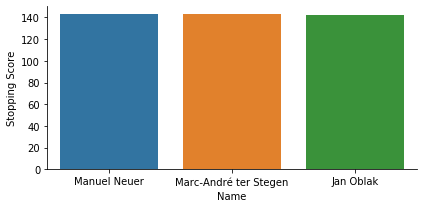

In [60]:

#top stopper

d = data.sort_values('GK_Stopper', ascending=False)[:3] # top 3 selection

sns.catplot(x="Name", y="GK_Stopper", data=d, kind="bar" ,height=3, aspect=2) 

plt.ylabel("Stopping Score")



Text(3.6750000000000043, 0.5, 'Passing Score')

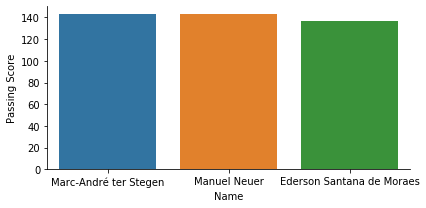

In [61]:
# top passer 

d = data.sort_values('GK_Pass', ascending=False)[:3] # top 3 selection
            
sns.catplot(x="Name", y="GK_Stopper", data=d,
                height=3, kind="bar", aspect=2 )
plt.ylabel("Passing Score")


In [43]:
# M Neuer tops in stopping category and M Stegen tops in passing 

d[(d['GK_Stopper'] + d['GK_Pass'] ) == (d['GK_Stopper'] + d['GK_Pass']).max()]['Name'] # max score after combining bpth attribues 

# Hence Marc-André ter Stegen is selected as GK

8    Marc-André ter Stegen
Name: Name, dtype: object